Project problem statement: To predict if the client will subscribe (yes/no) to a term deposit.


In [1]:
# Importing the neccessary libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### EDA on the dataset

In [2]:
#To read the data
df = pd.read_csv("bank.csv", na_values =['NA'])

In [3]:
# To view the first 5 rows in the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# To view the last 5 rows in the dataset
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [5]:
# The number of rows and columns in the data
rows, cols = df.shape
print("The number of rows are {} and columns are {}.".format(rows, cols))

The number of rows are 11162 and columns are 17.


In [6]:
# Various columns present, its non-null count and  data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [7]:
# to find the null value count of each column
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
print("The no:of null values in the complete dataset is", df.isnull().sum().sum())

The no:of null values in the complete dataset is 0


In [9]:
print("The no:of duplicated rows in the dataset is",df.duplicated().sum())


The no:of duplicated rows in the dataset is 0


#### NOTE: There are no null or duplicated values present in this dataset!

In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


## Correlation Check

In [11]:
df_corr=df.corr()
df_corr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


## Correlation Matrix of the numerical variables

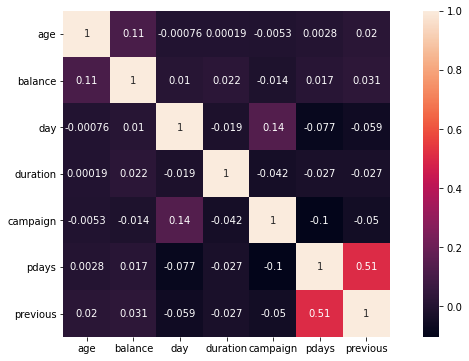

In [66]:
#pearson correlation(r)
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(df_corr,annot=True, square=True );

## Observation:
- There are no two numerical variables that are highly correlated to each other!
- There is a moderate correlation(r=0.51) between the pdays and the previous.

In [13]:
df.cov()

,age,balance,day,duration,campaign,pdays,previous
age,141.928366,4.315184e+03,-0.076486,0.782547,-0.171159,3.593995,0.550713
balance,4315.183833,1.040329e+07,284.299484,25120.222216,-121.985317,6107.664002,227.733044
day,-0.076486,2.842995e+02,70.908854,-54.110259,3.140457,-70.730655,-1.138351
duration,0.782547,2.512022e+04,-54.110259,120498.116170,-39.268069,-1034.115689,-21.255941
campaign,-0.171159,-1.219853e+02,3.140457,-39.268069,7.409704,-30.411886,-0.310076
pdays,3.593995,6.107664e+03,-70.730655,-1034.115689,-30.411886,11828.363897,126.450007
previous,0.550713,2.277330e+02,-1.138351,-21.255941,-0.310076,126.450007,5.253297


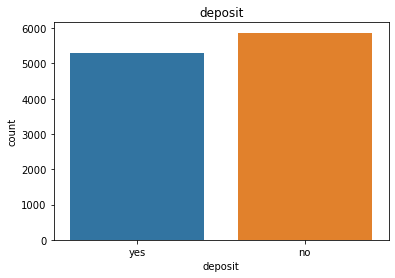

In [14]:
# target variable count
sns.countplot('deposit', data=df)
plt.title('deposit')
plt.show()

In [15]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

### Observation: 
- In the *target  variable*, there is $balance$ between number of clients who made the deposit( "yes") and who have not subsribed to deposit( "no").  

In [16]:
# The categorical variables and each of its unique values
categorical_features = []
for col in df.select_dtypes(include='object').columns:
    categorical_features.append(col)
    print(col,"-", df[col].unique())


job - ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital - ['married' 'single' 'divorced']
education - ['secondary' 'tertiary' 'primary' 'unknown']
default - ['no' 'yes']
housing - ['yes' 'no']
loan - ['no' 'yes']
contact - ['unknown' 'cellular' 'telephone']
month - ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome - ['unknown' 'other' 'failure' 'success']
deposit - ['yes' 'no']


## Univariate analysis on categorical features

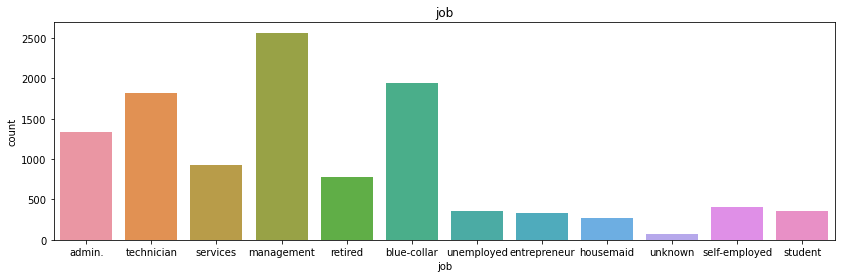

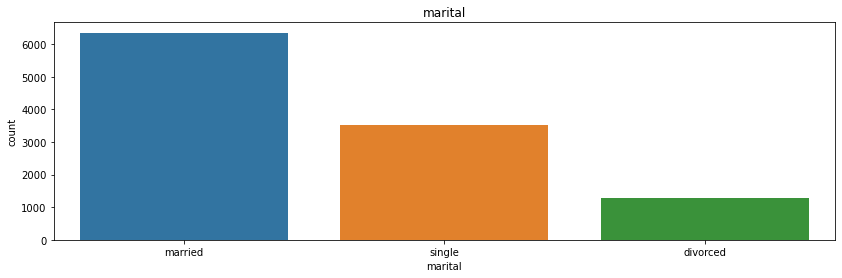

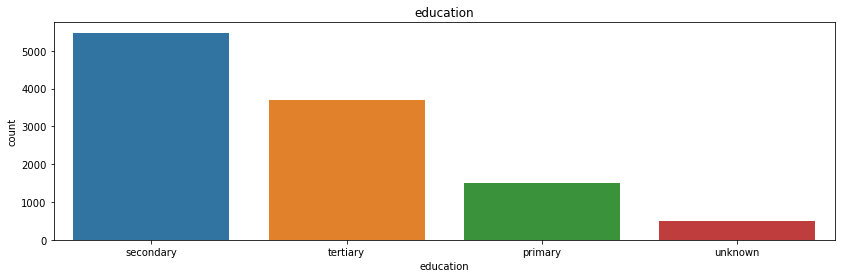

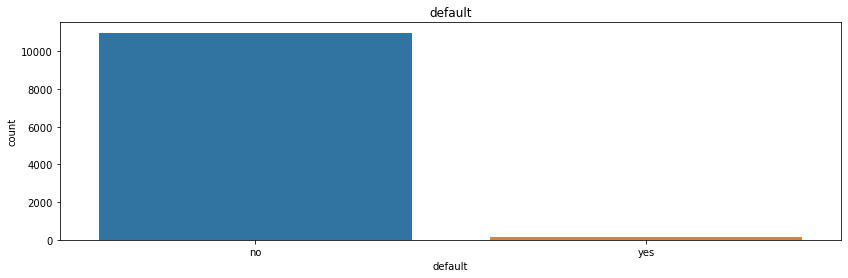

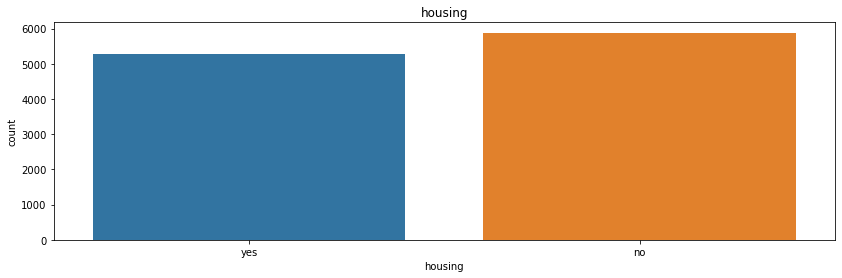

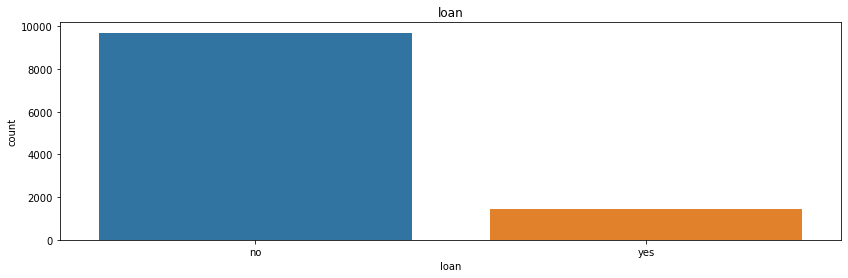

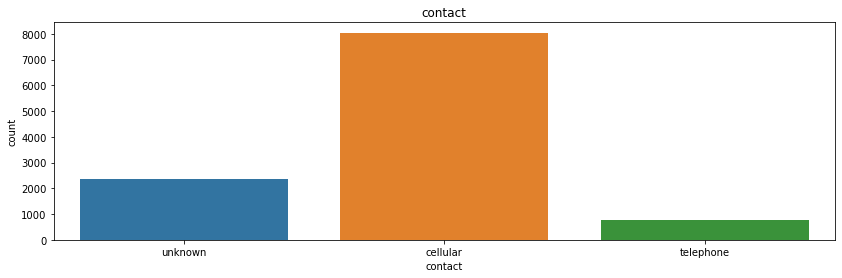

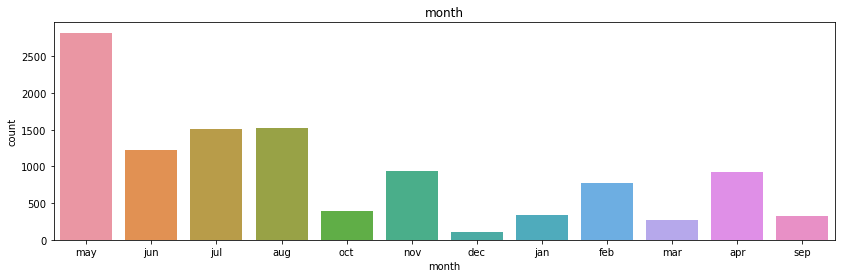

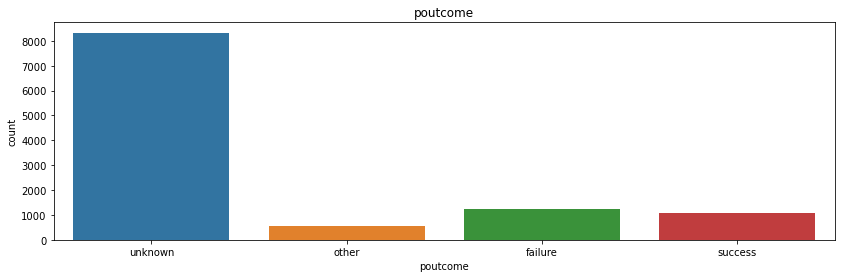

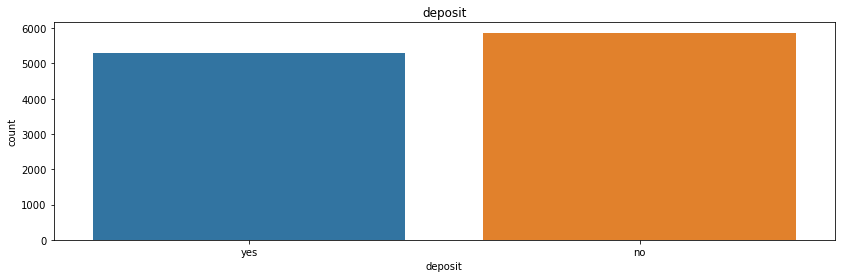

In [17]:
for cols in categorical_features:
    plt.figure(figsize=(14,4))
    sns.countplot(cols, data=df)
    plt.title(cols)
plt.show()
    

### observations:
- Clients with job types in Management are high in number and there are very few clients whose jobs are unknown in this data.
- Most of the clients marital status is married.
- Most clients have education background as secondary followed by tertiary. There are also very few clients whoes  education background is unknown.
- The deafult variable with 'no' type type is extremely higher in number than 'yes' i.e. most of the clients do not have default credit.
- In this data, the highest record of data collected is during May and least data is recorded during December.
- Most clients have not taken personal loans.
- The outcome from previous campaign is mostly unknown.

In [18]:
# for the 'unknown' in 'job' column whose age is greater than 60 can be replaced with 'retired'
df.loc[(df['job']=='unknown') & (df['age']>=60), 'job'] = 'retired'


In [19]:
df['poutcome'] = df['poutcome'].replace(['other'] , 'unknown')
df.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

### Relation of target variable with categorical features

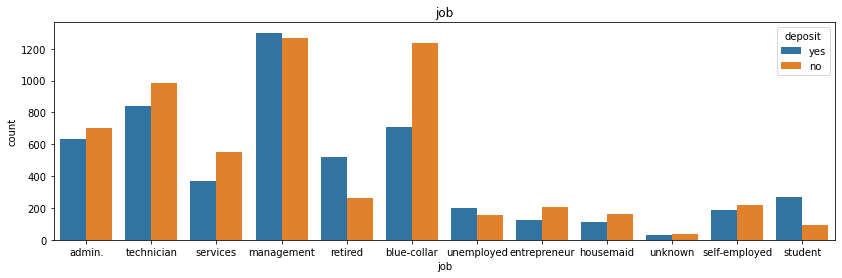

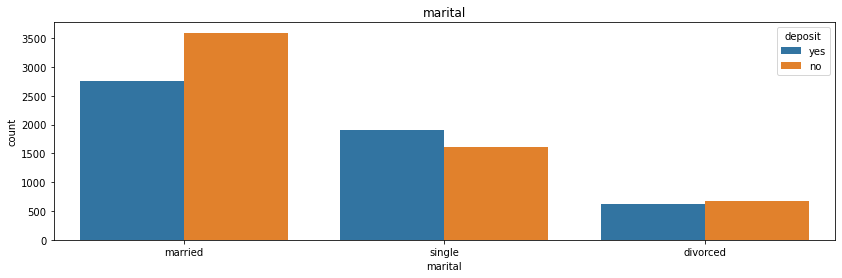

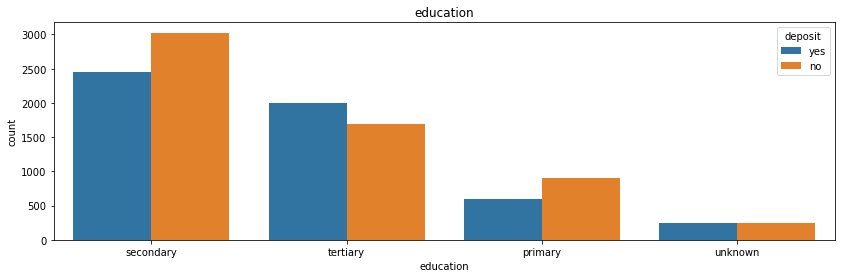

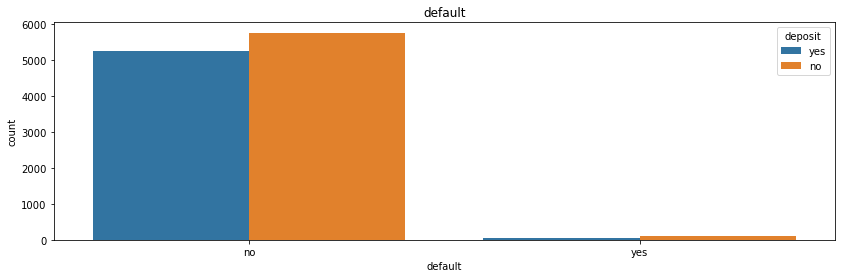

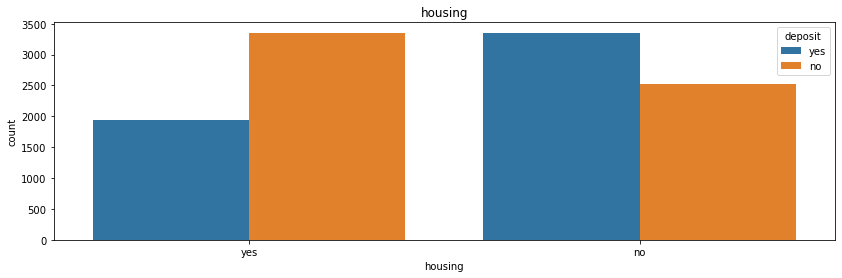

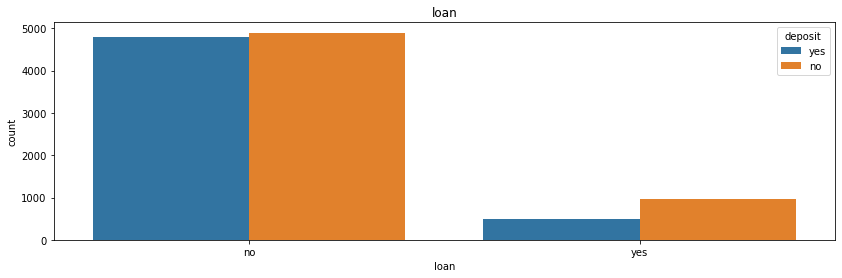

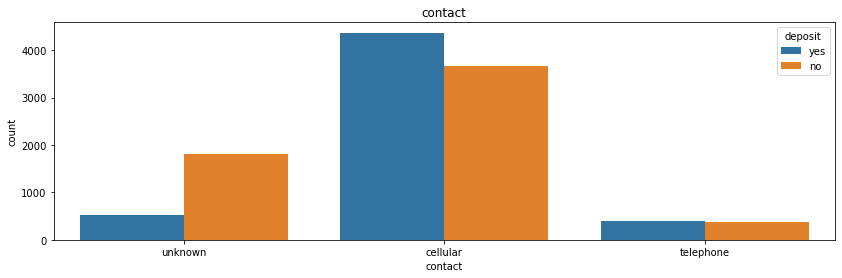

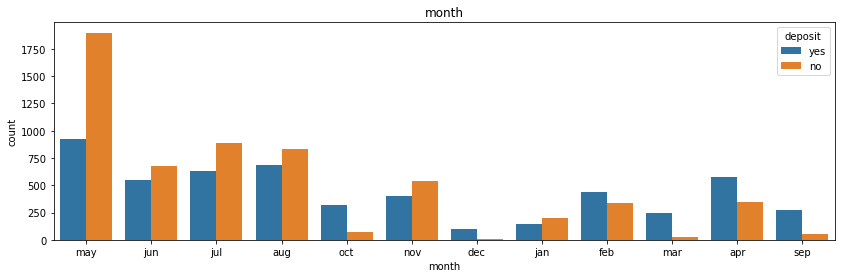

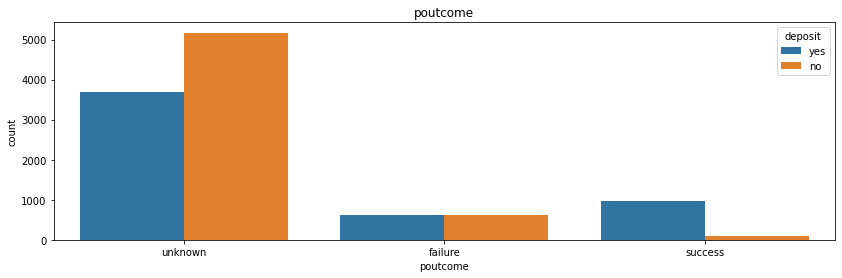

In [20]:
category_var = ['job','marital','education','default','housing','loan', 'contact','month','poutcome']
for cols in category_var:
    plt.figure(figsize=(14,4))
    sns.countplot(cols, data=df, hue='deposit')
    plt.title(cols)
plt.show()

In [21]:
df.groupby(['deposit','job']).size()

deposit  job          
no       admin.            703
         blue-collar      1236
         entrepreneur      205
         housemaid         165
         management       1265
         retired           264
         self-employed     218
         services          554
         student            91
         technician        983
         unemployed        155
         unknown            34
yes      admin.            631
         blue-collar       708
         entrepreneur      123
         housemaid         109
         management       1301
         retired           520
         self-employed     187
         services          369
         student           269
         technician        840
         unemployed        202
         unknown            30
dtype: int64

In [22]:
df.groupby(['deposit','education']).size()

deposit  education
no       primary       909
         secondary    3026
         tertiary     1693
         unknown       245
yes      primary       591
         secondary    2450
         tertiary     1996
         unknown       252
dtype: int64

In [23]:
df.groupby(['deposit','marital']).size()

deposit  marital 
no       divorced     671
         married     3596
         single      1606
yes      divorced     622
         married     2755
         single      1912
dtype: int64

In [24]:
df.groupby(['deposit','loan']).size()

deposit  loan
no       no      4897
         yes      976
yes      no      4805
         yes      484
dtype: int64

In [25]:
df.groupby(['deposit','default']).size()

deposit  default
no       no         5757
         yes         116
yes      no         5237
         yes          52
dtype: int64

### Observation:
- Most clients who have deposited, do not have default credit.
- Even though most clients that have deposited have job as 'management', the clients who have not subscribed to deposit also belong to the same job.
- Most deposits are made by clients with marital status as 'married'
- The outcome of the previous campaign(poutcome) is mostly unknown
- Most deposits are recorded during month of May.
- Most clients with no deposits are also recorded during May.

### Visualization of numerical variables


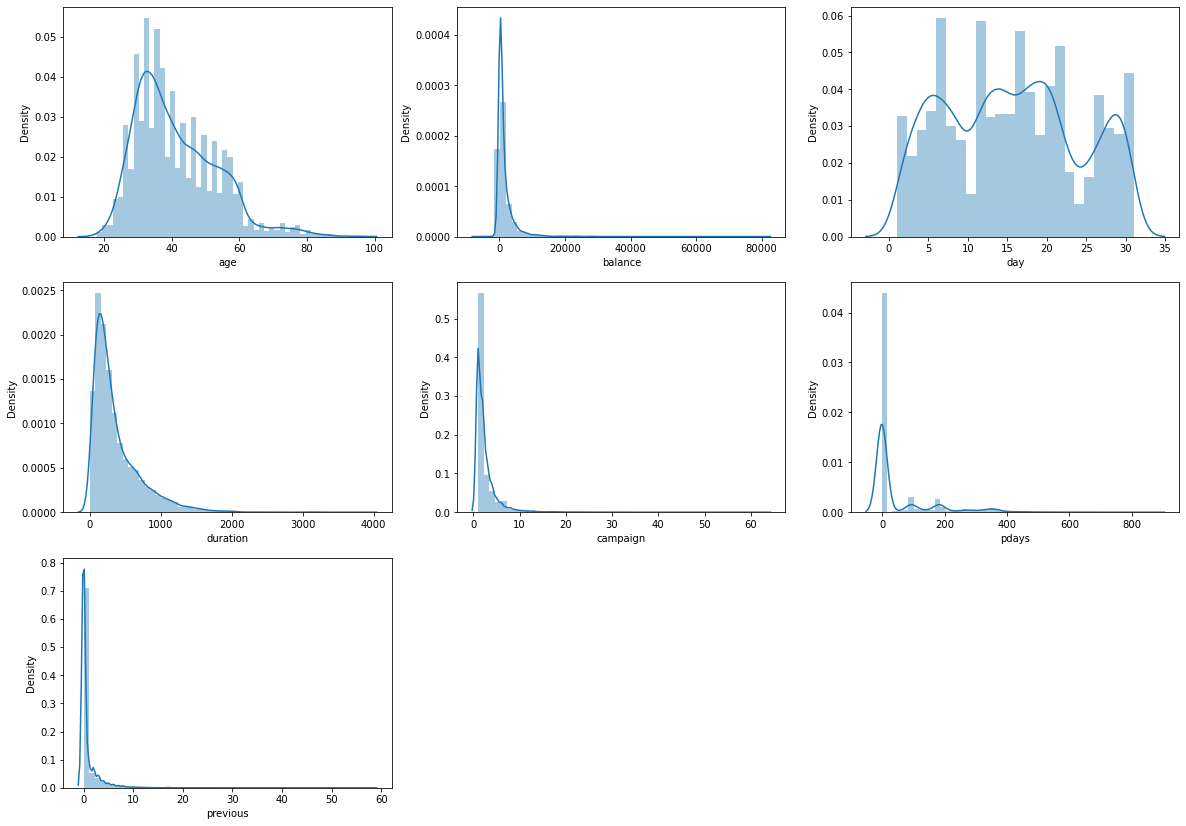

In [26]:
numeric_var= ['age', 'balance','day', 'duration','campaign', 'pdays', 'previous']
plt.figure(figsize=(20,60))
plot = 1
for cols in numeric_var:
    ax = plt.subplot(12,3,plot)
    sns.distplot(df[cols])
    plt.xlabel(cols)
    plot+=1
plt.show()

*Note:*
    - The distribution of following columns 'balance', 'duration','campaign', 'pdays', 'previous' are highly skewed.
    - All the columns except day have outliers

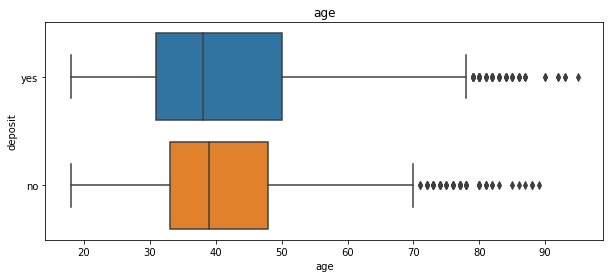

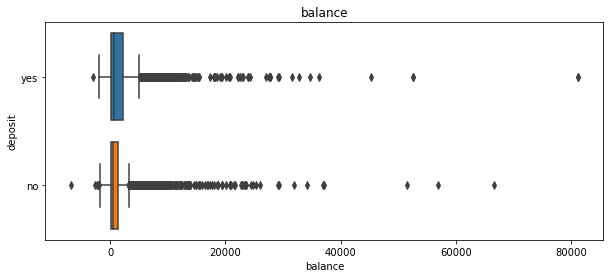

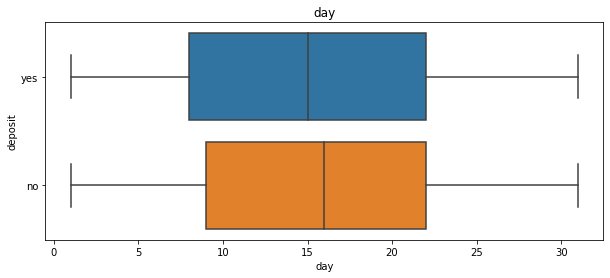

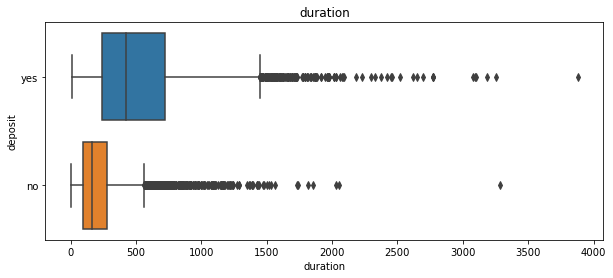

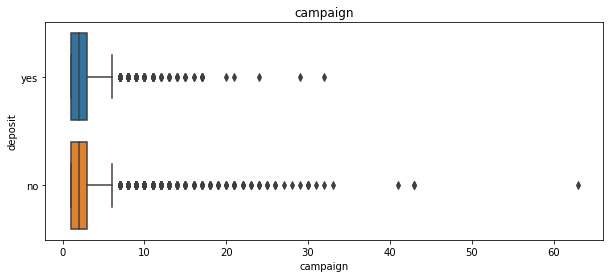

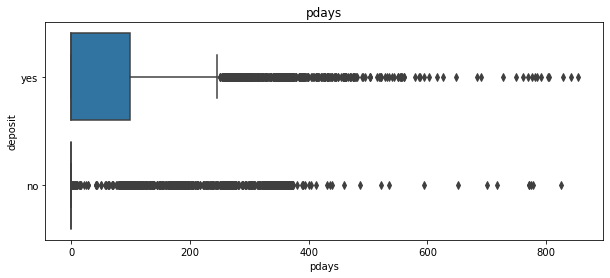

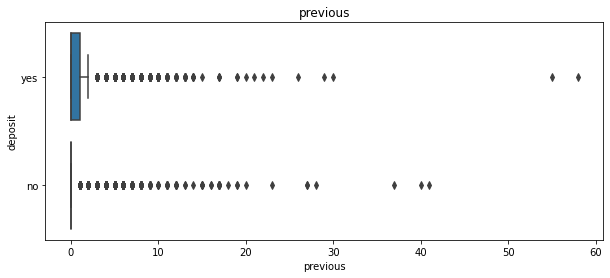

In [27]:
for cols in numeric_var:
    plt.figure(figsize=(10,4))
    sns.boxplot(x=cols, y='deposit', data=df)
    plt.title(cols)
    plt.show()

Text(0.5, 1.0, 'Distribution of age')

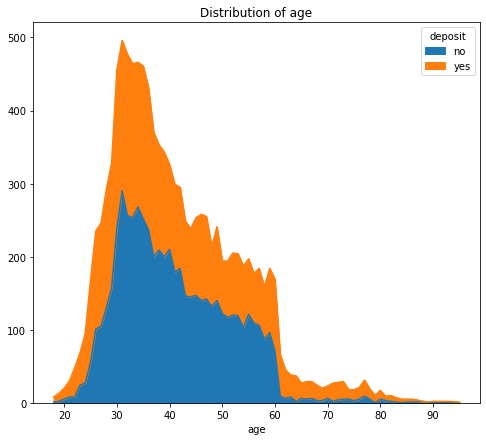

In [28]:
pd.crosstab(df.age,df.deposit).plot(kind="area", figsize=(8,7))
plt.title("Distribution of age")

### Observation:
- With respect to the target variable(deposit):
    - the client's median age in both cases are inbetween 38 to 40
    - deposits made by client's aged between 30-40 are high 
    - client's that have deposited had a longer duration converstaion 
     
   
- All the columns except day shows there are many outliers

In [29]:
monthly_deposit=df.groupby(by=['deposit','month']).size()
monthly_deposit

deposit  month
no       apr       346
         aug       831
         dec        10
         feb       335
         jan       202
         jul       887
         jun       676
         mar        28
         may      1899
         nov       540
         oct        69
         sep        50
yes      apr       577
         aug       688
         dec       100
         feb       441
         jan       142
         jul       627
         jun       546
         mar       248
         may       925
         nov       403
         oct       323
         sep       269
dtype: int64

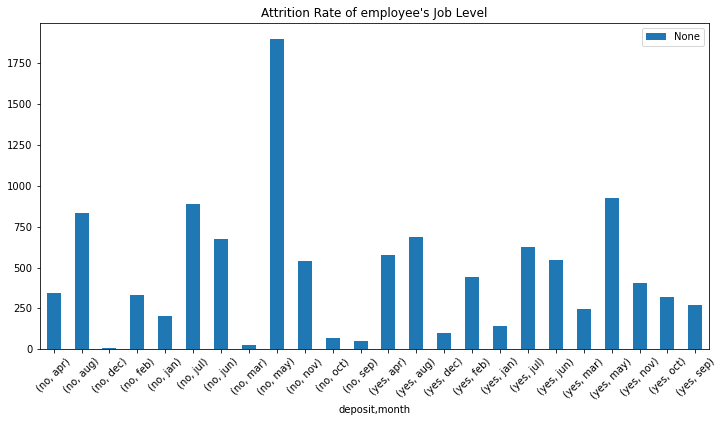

In [30]:
plt.figure(figsize=(12,6))
monthly_deposit.plot(kind='bar', legend=True)
plt.title("Attrition Rate of employee's Job Level")
plt.xticks(rotation=45)
plt.show()

In [31]:
df.groupby(['deposit','pdays']).size()

deposit  pdays
no       -1       4940
          1          2
          2          6
          5          2
          6          2
                  ... 
yes       804        1
          805        1
          828        1
          842        1
          854        1
Length: 732, dtype: int64

*Note:*
- We can see that, nearly 40% of the client's who have not subcribed to deposit in the data has -1 indicating that they have not been previously contacted. Therefore we can indicate this column with pdays = -1 has  not been contacted. And pdays >= 1 has been contacted.i.e.
    - if pdays = 0, means was not contacted before

    - if pdays = 1, means was contacted earlier



In [32]:
def pdays_conversion(pdays):
    if(pdays == -1):
        return(0)
    elif(pdays >= 0):
        return(1)
df['pdays'] = df['pdays'].apply(pdays_conversion)
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,0,unknown,yes


## Data Pre-Processing

In [33]:
# Importing the required libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from IPython.display import Image  
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report


In [34]:
new_df= df

In [35]:
new_df = new_df.drop(['day','contact'], axis=1)
new_df.head()

,age,job,marital,education,default,balance,housing,loan,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,may,1042,1,0,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,may,1467,1,0,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,may,1389,1,0,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,may,579,1,0,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,may,673,2,0,0,unknown,yes


In [36]:
def preprocessor(df):
    res_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
    return res_df

In [37]:
encoded_df = preprocessor(new_df)



In [38]:
x = encoded_df.drop(['deposit'],axis =1).values #testing data
y = encoded_df['deposit'].values #training data

In [39]:
x

array([[59,  0,  1, ...,  0,  0,  2],
       [56,  0,  1, ...,  0,  0,  2],
       [41,  9,  1, ...,  0,  0,  2],
       ...,
       [32,  9,  2, ...,  0,  0,  2],
       [43,  9,  1, ...,  1,  5,  0],
       [34,  9,  1, ...,  0,  0,  2]], dtype=int64)

In [40]:
y

array([1, 1, 1, ..., 0, 0, 0])

## Split the data into Train-Test

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2,random_state=50)

In [42]:
# To check if the testing data is a representator of the population
print("Shape of Training Data",x_train.shape)
print("Shape of Testing Data",x_test.shape)
print("Mean of Training Data",y_train.mean())
print("Mean of Testing Data",y_test.mean())

Shape of Training Data (8929, 14)
Shape of Testing Data (2233, 14)
Mean of Training Data 0.4736252659872326
Mean of Testing Data 0.47469771607702643


In [43]:
fit_dt = DecisionTreeClassifier(random_state=50)

In [44]:
import time
from sklearn.model_selection import train_test_split, GridSearchCV
np.random.seed(42)
start=time.time()

param_dist = {'max_depth': [8,9,10,11,12],
              'max_features':['auto', 'sqrt', 'log2', None],
              'criterion': ['gini'],
              'min_samples_split':[45,55,65,75,85,90]}


cv_rf = GridSearchCV(fit_dt, cv = 10,
                     param_grid=param_dist, 
                     n_jobs = 2)

cv_rf.fit(x_train, y_train)
print('Best Parameters using grid search: \n', cv_rf.best_params_)

end=time.time()
print("The time taken in grid search: {0: .2f}".format(end - start))

Best Parameters using grid search: 
 {'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_split': 55}
The time taken in grid search:  37.03


In [56]:
# Decision tree with depth = 13
model_dt_13 = DecisionTreeClassifier(random_state=50, max_depth=10, criterion = "gini", max_features= None,  min_samples_split= 55)
model_dt_13.fit(x_train, y_train)
model_dt_13_score_train = model_dt_13.score(x_train, y_train)
print("Training score: ",model_dt_13_score_train)
model_dt_13_score_test = model_dt_13.score(x_test, y_test)
print("Testing score: ",model_dt_13_score_test)

Training score:  0.84891925187591
Testing score:  0.8114643976712942


In [46]:
## Performance Metrics

In [57]:
y_pred_dt = model_dt_13.predict_proba(x_test)[:, 1]

In [58]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
roc_auc_dt

0.8834853383519118

In [59]:
predictions = model_dt_13.predict(x_test)
predictions

array([1, 0, 0, ..., 0, 0, 0])

## Area Under the Curve

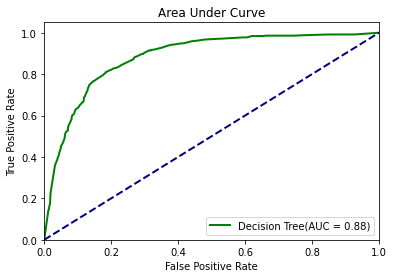

In [60]:
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

## Confusion Matrix

In [61]:
print (confusion_matrix(y_test, predictions))


[[963 210]
 [211 849]]


## recall, precision, f1-score

In [62]:
print("Classification Report\n",classification_report(y_test, predictions))

Classification Report
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1173
           1       0.80      0.80      0.80      1060

    accuracy                           0.81      2233
   macro avg       0.81      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



## Accuracy score

In [63]:
accuracy_score(y_test, predictions)

0.8114643976712942

In [64]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Success", "Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

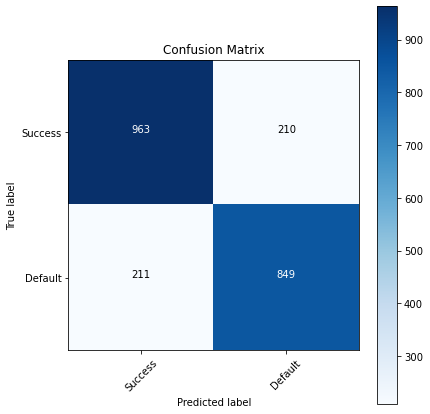

In [65]:
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions, normalize=False)
plt.show()